In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/deptweets/happyish_tweets.paraquet
/kaggle/input/deptweets/sad_tweets.paraquet


In [2]:
import pandas as pd

In [3]:
df_h = pd.read_parquet('/kaggle/input/deptweets/happyish_tweets.paraquet')
df_s = pd.read_parquet('/kaggle/input/deptweets/sad_tweets.paraquet')

In [4]:
df_h.head()

,created_at,text,edit_history_tweet_ids,author_id,id,public_metrics.retweet_count,public_metrics.reply_count,public_metrics.like_count,public_metrics.quote_count,labels
0,2022-11-12T21:39:37.000Z,Canadian doctors offices will now be using noo...,[1591546280706473984],2236687190,1591546280706473984,0,0,0,0,0
1,2022-11-12T21:34:22.000Z,Canadian doctor Okay based on your answers I...,[1591544958934482944],2236687190,1591544958934482944,0,0,0,0,1
2,2022-11-12T21:28:18.000Z,You WILL get in the pod you WILL breathe the ...,[1591543433092792320],2236687190,1591543433092792320,0,0,0,0,1
3,2022-11-12T21:16:26.000Z,DMs are open 💕,[1591540446907760641],2236687190,1591540446907760641,0,0,0,0,0
4,2022-11-12T02:29:51.000Z,NASA wants to send aliens our cocks,[1591256932358422529],2236687190,1591256932358422529,0,0,0,0,0


In [5]:
df_s.head()

,created_at,text,edit_history_tweet_ids,author_id,id,public_metrics.retweet_count,public_metrics.reply_count,public_metrics.like_count,public_metrics.quote_count,withheld.copyright,withheld.country_codes,labels
0,2022-11-20T18:13:36.000Z,i was diagnosed with BPD at 15 then at 21 recl...,[1594393536899780612],3206788973,1594393536899780612,0,0,9,0,None,None,1
1,2022-11-20T18:11:41.000Z,im having a very bad PTSD day sometimes we ha...,[1594393054001172484],3206788973,1594393054001172484,1,4,14,0,None,None,1
2,2022-11-20T14:01:20.000Z,I m in the control room ☎️,[1594330054724550656],3206788973,1594330054724550656,0,1,1,0,None,None,0
3,2022-11-20T13:42:48.000Z,gotta say the sunset in Abu Dhabi is beautiful 😎,[1594325387068248064],3206788973,1594325387068248064,0,1,8,0,None,None,0
4,2022-11-20T10:50:32.000Z,The Birmingham one we don t live too far away 😁,[1594282034800693248],3206788973,1594282034800693248,0,1,1,0,None,None,0


In [6]:
df_s['date']= pd.to_datetime(df_s['created_at']).dt.date
df_s['time']= pd.to_datetime(df_s['created_at']).dt.time
df_s['tweet_length'] = df_s['text'].apply(len)

In [7]:
df_h['date']= pd.to_datetime(df_h['created_at']).dt.date
df_h['time']= pd.to_datetime(df_h['created_at']).dt.time
df_h['tweet_length'] = df_h['text'].apply(len)

In [8]:
df_h.head()

,created_at,text,edit_history_tweet_ids,author_id,id,public_metrics.retweet_count,public_metrics.reply_count,public_metrics.like_count,public_metrics.quote_count,labels,date,time,tweet_length
0,2022-11-12T21:39:37.000Z,Canadian doctors offices will now be using noo...,[1591546280706473984],2236687190,1591546280706473984,0,0,0,0,0,2022-11-12,21:39:37,92
1,2022-11-12T21:34:22.000Z,Canadian doctor Okay based on your answers I...,[1591544958934482944],2236687190,1591544958934482944,0,0,0,0,1,2022-11-12,21:34:22,202
2,2022-11-12T21:28:18.000Z,You WILL get in the pod you WILL breathe the ...,[1591543433092792320],2236687190,1591543433092792320,0,0,0,0,1,2022-11-12,21:28:18,135
3,2022-11-12T21:16:26.000Z,DMs are open 💕,[1591540446907760641],2236687190,1591540446907760641,0,0,0,0,0,2022-11-12,21:16:26,14
4,2022-11-12T02:29:51.000Z,NASA wants to send aliens our cocks,[1591256932358422529],2236687190,1591256932358422529,0,0,0,0,0,2022-11-12,02:29:51,35


In [9]:
df_s.head()

,created_at,text,edit_history_tweet_ids,author_id,id,public_metrics.retweet_count,public_metrics.reply_count,public_metrics.like_count,public_metrics.quote_count,withheld.copyright,withheld.country_codes,labels,date,time,tweet_length
0,2022-11-20T18:13:36.000Z,i was diagnosed with BPD at 15 then at 21 recl...,[1594393536899780612],3206788973,1594393536899780612,0,0,9,0,None,None,1,2022-11-20,18:13:36,275
1,2022-11-20T18:11:41.000Z,im having a very bad PTSD day sometimes we ha...,[1594393054001172484],3206788973,1594393054001172484,1,4,14,0,None,None,1,2022-11-20,18:11:41,250
2,2022-11-20T14:01:20.000Z,I m in the control room ☎️,[1594330054724550656],3206788973,1594330054724550656,0,1,1,0,None,None,0,2022-11-20,14:01:20,27
3,2022-11-20T13:42:48.000Z,gotta say the sunset in Abu Dhabi is beautiful 😎,[1594325387068248064],3206788973,1594325387068248064,0,1,8,0,None,None,0,2022-11-20,13:42:48,48
4,2022-11-20T10:50:32.000Z,The Birmingham one we don t live too far away 😁,[1594282034800693248],3206788973,1594282034800693248,0,1,1,0,None,None,0,2022-11-20,10:50:32,48


In [10]:
def f(x):
    if (x > 4) and (x <= 12):
        return 1
    elif (x > 12) and (x <= 16):
        return 2
    elif (x > 16) and (x <= 21) :
        return 3
    elif (x > 21) and (x <= 4):
        return 4
    
    ''' 1 Morning
        2 Noon
        3 Evening
        4 Night'''

In [11]:
df_s['timeofday'] =  pd.to_datetime(df_s['created_at']).dt.hour
df_s['timeofday'] = df_s['timeofday'].apply(f)

In [12]:
df_h['timeofday'] =  pd.to_datetime(df_h['created_at']).dt.hour
df_h['timeofday'] = df_h['timeofday'].apply(f)

In [13]:
df_h['tweet_supp'] = (df_h['public_metrics.reply_count']+df_h['public_metrics.like_count']+df_h['public_metrics.quote_count']+1)/(df_h['public_metrics.retweet_count']+2)
df_s['tweet_supp'] = (df_s['public_metrics.reply_count']+df_s['public_metrics.like_count']+df_s['public_metrics.quote_count']+1)/(df_s['public_metrics.retweet_count']+2)

In [14]:
frames = [df_h, df_s]
df_combined = pd.concat(frames)

In [15]:
df_combined['tweet_supp'].describe()

count    23791.000000
mean         1.498371
std          8.508387
min          0.000003
25%          0.500000
50%          0.500000
75%          1.100000
max        355.500000
Name: tweet_supp, dtype: float64

In [16]:
thresh = df_combined['tweet_supp'].mean()+df_combined['tweet_supp'].std()
thresh

10.006757578480647

In [17]:
def c(x):
    if x<=2:
        return 0
    elif x>2:
        return 1

In [18]:
df_combined['support_level'] = df_combined['tweet_supp'].apply(c)

In [19]:
df_combined.info

<bound method DataFrame.info of                      created_at  \
0      2022-11-12T21:39:37.000Z   
1      2022-11-12T21:34:22.000Z   
2      2022-11-12T21:28:18.000Z   
3      2022-11-12T21:16:26.000Z   
4      2022-11-12T02:29:51.000Z   
...                         ...   
12505  2022-11-15T14:57:27.000Z   
12506  2022-11-15T14:56:09.000Z   
12507  2022-11-14T20:28:31.000Z   
12508  2022-11-14T08:32:26.000Z   
12509  2022-11-13T20:55:42.000Z   

                                                    text  \
0      Canadian doctors offices will now be using noo...   
1      Canadian doctor  Okay  based on your answers I...   
2      You WILL get in the pod  you WILL breathe the ...   
3                                         DMs are open 💕   
4                    NASA wants to send aliens our cocks   
...                                                  ...   
12505  My favourite add is the maxima one where all t...   
12506  Today is a good day bc my guitar class just go...   
12507  

In [20]:
#number of tweets where support is 'high' (likes+quotes+reply/RT)
len(df_combined[df_combined['support_level']==1])

2324

In [21]:
#number of tweets where tweet is 'depressive'
len(df_combined[df_combined['labels']==1])

4717

In [22]:
#number of tweets where support is 'high' and depressive
len(df_combined[(df_combined['support_level']==1) & (df_combined['labels']==1)])

642

In [23]:
#number of tweets where support is 'low' and depressive
len(df_combined[(df_combined['support_level']==0) & (df_combined['labels']==1)])

4075

In [24]:
#wrong method
#control_df = df_combined[(df_combined['support_level']==1) & (df_combined['labels']==1)]
#treatment = df_combined[(df_combined['support_level']==1) & (df_combined['labels']==1)]x

In [25]:
#treatment group-> high support + depressive
#control any tweet +less support

# OR

#but keep the original combined dataset, then for every unique id in treatment group, get a random tweet from treatment group
#then calculate the Treatment effect for each unique id by %of depressive tweets before the date of the random tweet - % of depressive tweets after the date of the random tweet
#note down the ATE
#do matching with attributes like tweet_supp(value), tweet_length, time of day? M distance, PSM
#then note down ATE for each.



In [26]:
#tweets
For_treatment_users = df_combined[(df_combined['support_level']==1) & (df_combined['labels']==1)]

treatment_users = dict()
For_treatment_users = For_treatment_users.drop_duplicates('author_id', keep='last')

#users
treatment_users = For_treatment_users['author_id']
treatment_users.count

<bound method Series.count of 29                 264143300
60                 197139260
117               1380245216
282               1463673584
358      1584234539659902976
                ...         
12143    1527376739038818304
12176     695675851745067008
12210             1247796176
12258     887026762705756160
12458             2566222201
Name: author_id, Length: 286, dtype: object>

In [27]:
For_treatment =For_treatment_users

In [28]:
users1 = df_combined['author_id']
users1.count()

23791

In [29]:
df_users = df_combined.drop_duplicates('author_id', keep='last')
users = df_users['author_id']
users.count()

870

In [30]:
df_users = df_combined.drop_duplicates('author_id', keep='last')
users = df_users['author_id']
users.count()

870

In [31]:
#control
df_control = df_combined[~users1.isin(treatment_users)]

In [32]:
df_control_users = df_control.drop_duplicates('author_id', keep='last')
control_users = df_control_users['author_id']
control_users.count()

584

In [33]:
column_names = list(For_treatment_users.columns.values)
random_treatment_tweet=pd.DataFrame(columns= column_names)
random_treatment_tweet

,created_at,text,edit_history_tweet_ids,author_id,id,public_metrics.retweet_count,public_metrics.reply_count,public_metrics.like_count,public_metrics.quote_count,labels,date,time,tweet_length,timeofday,tweet_supp,withheld.copyright,withheld.country_codes,support_level


In [34]:
For_treatment_users.columns.values

array(['created_at', 'text', 'edit_history_tweet_ids', 'author_id', 'id',
       'public_metrics.retweet_count', 'public_metrics.reply_count',
       'public_metrics.like_count', 'public_metrics.quote_count',
       'labels', 'date', 'time', 'tweet_length', 'timeofday',
       'tweet_supp', 'withheld.copyright', 'withheld.country_codes',
       'support_level'], dtype=object)

In [35]:
#for tu in treatment_users():
   # random_treatment_tweet.loc[len(random_treatment_tweet)] = For_treatment_users[For_treatment_users['author_id'] == tu].sample(n=1)

In [36]:
#random_treatment_tweet

In [37]:
For_treatment_users['Control/treatment'] = 'T'

In [38]:
import random

unique_list = list(df_combined['author_id'].unique())   
df_result=pd.DataFrame(columns = ['author_id','Score'])
res = []
for i in unique_list:
    df_i = df_combined[df_combined['author_id'] == i]
    l = len(df_i)
    r = random.randrange(0, l)
    k=0
    df_i.reset_index(inplace = True)
    try:
        while True:
            if df_i['labels'][k] != 1 :
                k+=1
            else:
                break
    except:
        pass
    for j in range(r):
        k += df_i['labels'][j]
    k_aft = 0
    for pp in range(r,l):
        k_aft += df_i['labels'][pp] 
    Result_df = pd.Series([])
    score = (k+1)/(k_aft+2)
    l = [i,score]
    res.append(l)

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:25: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.


In [39]:
df_result = pd.DataFrame (res, columns = ['author_id','Score'])

In [40]:
For_treatment_users['Control/treatment'] = 'T'

In [41]:
df_result['Control/Treatment'] = 'T'

In [42]:
for i in control_users:
    df_result.loc[df_result['author_id'] == i, 'Control/Treatment'] = 'C'

In [43]:
# df_result.drop('c/t',inplace = True,axis = 1)

treatment effect per user, and if he/she is in control/treatment group

In [44]:
df_result

,author_id,Score,Control/Treatment
0,2236687190,3.000000,C
1,264143300,2.666667,T
2,197139260,1.272727,T
3,1569437508336816130,2.500000,C
4,343464115,2.079646,T
...,...,...,...
865,1561481190904840196,5.000000,C
866,147694447,1.000000,C
867,2566222201,3.500000,T
868,1519285037069393923,1.750000,C


# Average Treatment effect

In [45]:
ATE = df_result.groupby(['Control/Treatment']).mean()

In [46]:
ATE

,Score
Control/Treatment,
C,3.766997
T,2.511787


matching

In [47]:
df_result['Score'].rename('Treatment Effect',inplace = True)

0      3.000000
1      2.666667
2      1.272727
3      2.500000
4      2.079646
         ...   
865    5.000000
866    1.000000
867    3.500000
868    1.750000
869    7.000000
Name: Treatment Effect, Length: 870, dtype: float64

In [48]:
df_matching = df_combined.groupby(['author_id']).sum()

In [49]:
df_matching

,public_metrics.retweet_count,public_metrics.reply_count,public_metrics.like_count,public_metrics.quote_count,labels,tweet_length,timeofday,tweet_supp,support_level
author_id,,,,,,,,,
100122237,15455,12,18,0,5,3069,49.0,26.162346,1
1001921919069782016,27243,5,38,0,4,2121,24.0,28.668001,1
1004859220431462400,3938,31,22,1,3,3079,46.0,41.500254,4
1005480194596134912,75658,1,30,0,3,2772,63.0,18.904760,3
1006521602769481728,3358,228,9493,91,14,5343,70.0,162.736001,24
...,...,...,...,...,...,...,...,...,...
984189359795482624,0,0,0,0,2,511,6.0,1.500000,0
989529295159783424,6,0,11,0,10,4704,63.0,18.916667,0
989864942,0,0,2,0,6,1204,9.0,4.000000,0


In [50]:
df_result.set_index(['author_id'],inplace = True)

In [51]:
df_result

,Score,Control/Treatment
author_id,,
2236687190,3.000000,C
264143300,2.666667,T
197139260,1.272727,T
1569437508336816130,2.500000,C
343464115,2.079646,T
...,...,...
1561481190904840196,5.000000,C
147694447,1.000000,C
2566222201,3.500000,T


In [52]:
df_match = pd.concat([df_matching,df_result],join= 'inner',axis = 1,)

In [53]:
df_match = df_match[['labels','tweet_length','tweet_supp','support_level','Score','Control/Treatment']]

In [54]:
df_match['propensity_score'] = df_match['labels'] + (df_match['tweet_length']/df_match['tweet_length'].mean())\
+ (df_match['tweet_supp']/df_match['tweet_supp'].median())\
+ (df_match['support_level']/df_match['support_level'].median())\
+ (df_match['Score']/df_match['Score'].mean())

In [55]:
df_match

,labels,tweet_length,tweet_supp,support_level,Score,Control/Treatment,propensity_score
author_id,,,,,,,
100122237,5,3069,26.162346,1,2.333333,C,8.993140
1001921919069782016,4,2121,28.668001,1,0.600000,C,7.207785
1004859220431462400,3,3079,41.500254,4,2.500000,C,10.685771
1005480194596134912,3,2772,18.904760,3,3.200000,T,8.832283
1006521602769481728,14,5343,162.736001,24,1.571429,T,47.350696
...,...,...,...,...,...,...,...
984189359795482624,2,511,1.500000,0,0.500000,C,2.412614
989529295159783424,10,4704,18.916667,0,0.400000,C,12.758224
989864942,6,1204,4.000000,0,2.000000,C,7.236621


In [56]:
df_c = df_match[df_match['Control/Treatment'] == 'C']
df_t = df_match[df_match['Control/Treatment'] == 'T']


<AxesSubplot:>

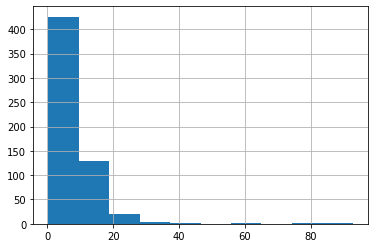

In [57]:
df_c['propensity_score'].hist()

In [58]:
import numpy as np
df_c['propensity_score'] = np.round(df_c['propensity_score'], decimals=0)
df_t['propensity_score'] = np.round(df_t['propensity_score'], decimals=0)


/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [59]:
import itertools 

#match users is they have same prop score in the control and treatment
k = 0
mat = []
j_temp = []
for i,iid in zip(df_c['propensity_score'],df_c.index):
    for j,jid in zip(df_t['propensity_score'],df_t.index):
        if i == j and jid not in j_temp:
            k+=1
            j_temp.append(jid)
            mat.append([iid,jid])
            break
            
        

In [60]:
mat = [j for sub in mat for j in sub] #flatten the array

In [61]:
df_match_temp = df_match

In [62]:
for i in df_match.index:
    if i not in mat:
        df_match = df_match.drop(i)


In [63]:
df_match

,labels,tweet_length,tweet_supp,support_level,Score,Control/Treatment,propensity_score
author_id,,,,,,,
100122237,5,3069,26.162346,1,2.333333,C,8.993140
1001921919069782016,4,2121,28.668001,1,0.600000,C,7.207785
1004859220431462400,3,3079,41.500254,4,2.500000,C,10.685771
1005480194596134912,3,2772,18.904760,3,3.200000,T,8.832283
1007983281281949696,1,879,30.017462,0,7.500000,C,4.832342
...,...,...,...,...,...,...,...
944948680150396928,2,1886,87.018790,10,5.750000,C,18.081652
964053572634718208,4,1821,35.017899,5,1.333333,T,11.572916
97146266,1,1662,56.666667,3,12.500000,T,10.741285


In [64]:
ATE_after_matching = df_match.groupby(['Control/Treatment']).mean()

In [65]:
ATE_after_matching ## score is the ATE after matching

,labels,tweet_length,tweet_supp,support_level,Score,propensity_score
Control/Treatment,,,,,,
C,6.454054,2920.324324,35.737642,2.059459,4.441152,12.475463
T,5.189189,2325.837838,39.581430,3.918919,2.690980,12.474527
